# Unbreakable encryption

A **one-time pad** is a way of encrypting a piece of data by combininig it with meaningless random dummy data in such a way that the original cannot be reconstituted without access to both the product and the dummy data. In essence, this leaves the encrypter with a key pair. One key is the product, and the other is the random dummy data. One key on its own is uselesss; **only the combination of both keys can unlock the original data**.

When performed correctly, a one-time pad is a form of unbreakable encryption.

This figure shows the process:

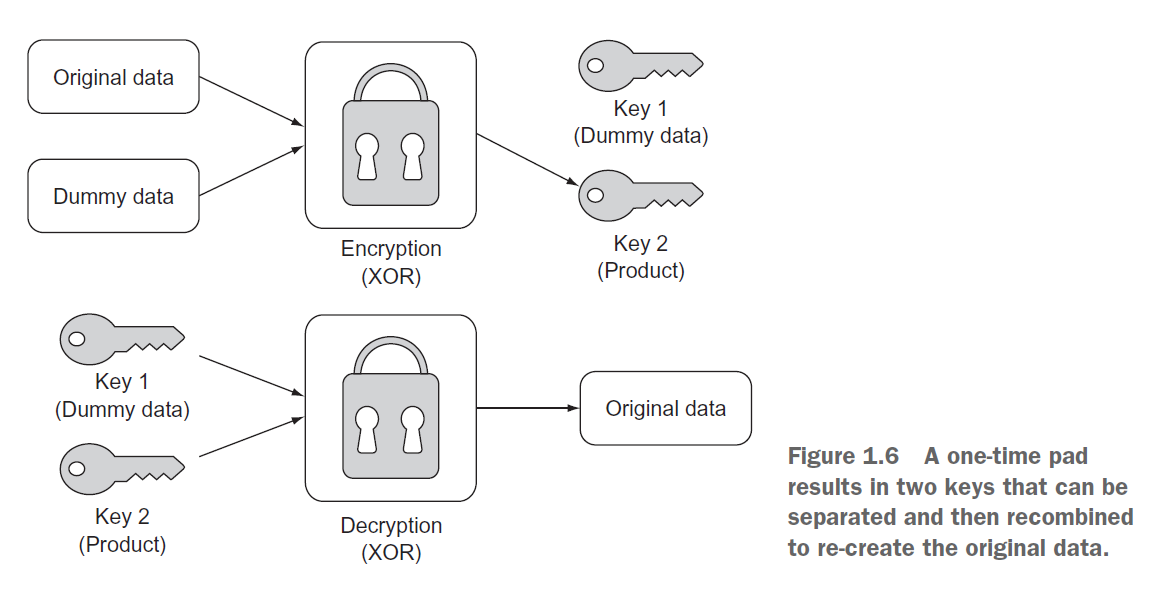

In this example, we will encrypt a `str` using a one-time pad. A `str` can be converted into a sequence of UTF-8 bytes (represented as the `bytes` type) through the `encode()` method. Likewise, a sequence of UTF-8 bytes can be converted back into a `str` using the `decode()` method on the `bytes` type.

In this example we will use the pseudo-random data generating function `token_bytes()` from the `secrets` module. Let's generate a random key for use as dummy data.

In [4]:
from secrets import token_bytes 
from typing import Tuple

def random_key(length: int) -> int:
    # Generate lenght random bytes
    tb: bytes = token_bytes(length)
    # Convert those bytes into a bit string and return it
    return int.from_bytes(tb, "big")   #Creates an int filled with lenght random bytes

The method `from_bytes` is used to convert from `bytes` to `int`. For example, it will take 7 bytes (= 56 bits) and convert them into a 56-bit integer.
Bitwise operations can be executed more easily and performantly on a single `int`than on many individual bytes in a sequence.

### Encrypting and decrypting.

The XOR operations has the following property:   
A xor B = C
C xor B = A
C cor A = B

This key insight forms the basis of one-time pad encryption:

In [5]:
def encrypt(original: str) -> Tuple[int, int]:
    original_bytes: bytes = original.encode()
    dummy: int = random_key(len(original_bytes))
    original_key: int = int.from_bytes(original_bytes, 'big')  #Second argument indicates big endian
    encrypted: int = original_key ^ dummy   # XOR
    return dummy, encrypted

Decryption is simply a matter combining the key pair we generated with `encrypt()`. This is achieved once again by doing an XOR operation. The ultimate output must be converted back to a `str`. First, the `int` is converted to `bytes` using `int.to_bytes()`. This method requires the number of bytes to be converted from the `int`. To gt this number, we divide the bit length by eight. Finally, the `bytes` method `decode` gives us back a `str`.

In [8]:
def decrypt (key1: int, key2: int) -> str:
    decrypted: int = key1 ^ key2   # XOR
    temp: bytes = decrypted.to_bytes((decrypted.bit_length() + 7 ) // 8, "big")  # It was necessary to add 7 to ensure 
                                                                                 # that we 'round up', to avoid off-by-one error.
    return temp.decode()

If our one-time pad encryption truly works, we should be able to encrpyt and decrypt the same Unicode string:

In [9]:
key1, key2 = encrypt("One Time Pad!")
result: str = decrypt(key1, key2)
print(result)

One Time Pad!
